In [133]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [134]:
cell_df = pd.read_csv('../data/Traffic.csv')
cell_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Predicted +15,Predicted +30,Predicted +45
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,low,low,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,low,low,normal
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,low,normal,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,normal,low,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,low,low,low


In [135]:
#Convertir la columna categorica "Day of the week" en numerica
days_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
cell_df['Day of the week'] = cell_df['Day of the week'].map(days_mapping)
# cell_df.head()

#Convertir la columna categorica "Traffic flow" en numerica
traffic_mapping = {'low': 0, 'normal': 1, 'high': 2, 'heavy' : 3}
cell_df['Traffic Situation'] = cell_df['Traffic Situation'].map(traffic_mapping)
cell_df['Predicted +15'] = cell_df['Predicted +15'].map(traffic_mapping)
cell_df['Predicted +30'] = cell_df['Predicted +30'].map(traffic_mapping)
cell_df['Predicted +45'] = cell_df['Predicted +45'].map(traffic_mapping)
cell_df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Predicted +15,Predicted +30,Predicted +45
0,12:00:00 AM,10,1,31,0,4,4,39,0,0.0,0.0,0.0
1,12:15:00 AM,10,1,49,0,3,3,55,0,0.0,0.0,1.0
2,12:30:00 AM,10,1,46,0,3,6,55,0,0.0,1.0,0.0
3,12:45:00 AM,10,1,51,0,2,5,58,0,1.0,0.0,0.0
4,1:00:00 AM,10,1,57,6,15,16,94,1,0.0,0.0,0.0


In [136]:
#Convertir la columna 'Time'(columna 0) formato datetime (hora real)
cell_df['Time'] = pd.to_datetime(cell_df['Time'])
cell_df.head(20)


/var/folders/ss/115vlqdj57x0b1mh4sxrw3sh0000gn/T/ipykernel_26112/2666553299.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cell_df['Time'] = pd.to_datetime(cell_df['Time'])


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Predicted +15,Predicted +30,Predicted +45
0,2025-11-03 00:00:00,10,1,31,0,4,4,39,0,0.0,0.0,0.0
1,2025-11-03 00:15:00,10,1,49,0,3,3,55,0,0.0,0.0,1.0
2,2025-11-03 00:30:00,10,1,46,0,3,6,55,0,0.0,1.0,0.0
3,2025-11-03 00:45:00,10,1,51,0,2,5,58,0,1.0,0.0,0.0
4,2025-11-03 01:00:00,10,1,57,6,15,16,94,1,0.0,0.0,0.0
5,2025-11-03 01:15:00,10,1,44,0,5,4,53,0,0.0,0.0,0.0
6,2025-11-03 01:30:00,10,1,37,0,1,4,42,0,0.0,0.0,0.0
7,2025-11-03 01:45:00,10,1,42,4,4,5,55,0,0.0,0.0,0.0
8,2025-11-03 02:00:00,10,1,51,0,9,7,67,0,0.0,0.0,0.0
9,2025-11-03 02:15:00,10,1,34,0,4,7,45,0,0.0,0.0,0.0


In [137]:
# Convertir a hora decimal: hora + (minutos / 60) de x
cell_df['Time'] = cell_df['Time'].dt.hour + cell_df['Time'].dt.minute / 60
cell_df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Predicted +15,Predicted +30,Predicted +45
0,0.00,10,1,31,0,4,4,39,0,0.0,0.0,0.0
1,0.25,10,1,49,0,3,3,55,0,0.0,0.0,1.0
2,0.50,10,1,46,0,3,6,55,0,0.0,1.0,0.0
3,0.75,10,1,51,0,2,5,58,0,1.0,0.0,0.0
4,1.00,10,1,57,6,15,16,94,1,0.0,0.0,0.0


In [138]:
#
X = np.asarray(cell_df[['Time','Date','Day of the week','CarCount','BikeCount','BusCount','TruckCount','Total','Traffic Situation']])
X[0:5]

array([[ 0.  , 10.  ,  1.  , 31.  ,  0.  ,  4.  ,  4.  , 39.  ,  0.  ],
       [ 0.25, 10.  ,  1.  , 49.  ,  0.  ,  3.  ,  3.  , 55.  ,  0.  ],
       [ 0.5 , 10.  ,  1.  , 46.  ,  0.  ,  3.  ,  6.  , 55.  ,  0.  ],
       [ 0.75, 10.  ,  1.  , 51.  ,  0.  ,  2.  ,  5.  , 58.  ,  0.  ],
       [ 1.  , 10.  ,  1.  , 57.  ,  6.  , 15.  , 16.  , 94.  ,  1.  ]])

In [139]:
y = np.asarray(cell_df[['Predicted +15','Predicted +30','Predicted +45']])
y[0:5]

array([[0., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [144]:
from sklearn.preprocessing import StandardScaler
# --- ¡Paso Crucial: Escalar las entradas! ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Keras necesita que las salidas estén en un formato de lista para este tipo de modelo
y_list = [y[:, 0], y[:, 1], y[:, 2]]

In [145]:
import tensorflow as tf

# --- Definir el modelo Multi-Salida ---

# Capa de entrada común para las 9 características
input_layer = tf.keras.layers.Input(shape=(9,), name='entrada_principal')

# Capa oculta común
hidden_layer = tf.keras.layers.Dense(12, activation='relu')(input_layer)

# --- Tres "cabezas" de salida, una para cada predicción ---

# Cabeza de salida para +15 min
output_15 = tf.keras.layers.Dense(4, activation='softmax', name='salida_15_min')(hidden_layer)

# Cabeza de salida para +30 min
output_30 = tf.keras.layers.Dense(4, activation='softmax', name='salida_30_min')(hidden_layer)

# Cabeza de salida para +45 min
output_45 = tf.keras.layers.Dense(4, activation='softmax', name='salida_45_min')(hidden_layer)

# Crear el modelo final especificando las entradas y las tres salidas
model = tf.keras.Model(inputs=input_layer, outputs=[output_15, output_30, output_45])

In [146]:
# --- Compilar el modelo (Versión Corregida) ---
# Como tenemos 3 salidas, le damos una función de pérdida y una métrica a cada una.
# Usamos un diccionario para que sea más claro.
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics={
                  'salida_15_min': 'accuracy',
                  'salida_30_min': 'accuracy',
                  'salida_45_min': 'accuracy'
              })

# Ver el resumen de la nueva arquitectura
model.summary()


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada_principal   │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 12)        │        120 │ entrada_principa… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ salida_15_min       │ (None, 4)         │         52 │ dense_21[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ salida_30_min       │ (None, 4)         │         52 │ dense_21[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ salida_45_min       │ (None, 4)         │         52 │ dense_21[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

Iniciando entrenamiento del modelo multi-salida...
Entrenamiento finalizado.


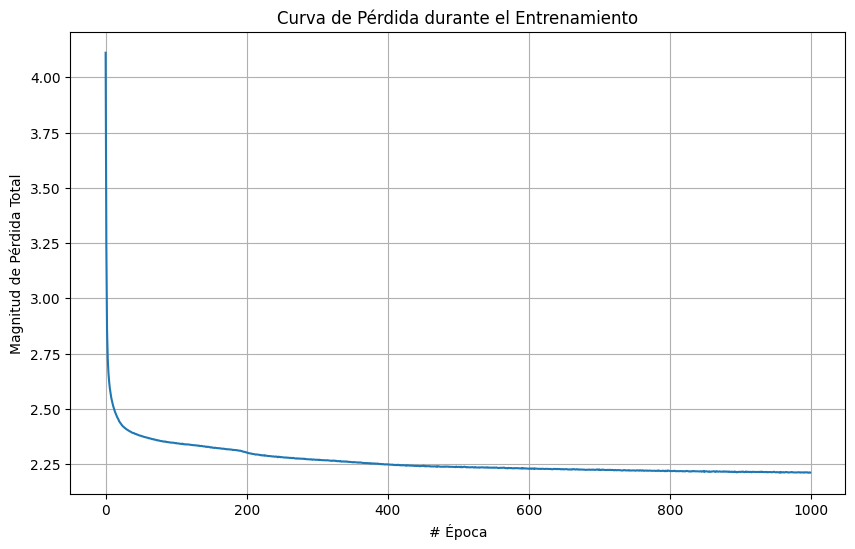

In [147]:
# --- Entrenamiento ---
print("Iniciando entrenamiento del modelo multi-salida...")

# Le pasamos X_scaled y la lista de las 3 columnas de 'y'
historial = model.fit(X_scaled, y_list, epochs=1000, verbose=False)

print("Entrenamiento finalizado.")

# --- Graficar la Pérdida ---
# El historial ahora contiene la pérdida de cada salida. Podemos sumar las pérdidas.
total_loss = np.sum([historial.history['salida_15_min_loss'], 
                     historial.history['salida_30_min_loss'], 
                     historial.history['salida_45_min_loss']], axis=0)

plt.figure(figsize=(10, 6))
plt.xlabel('# Época')
plt.ylabel('Magnitud de Pérdida Total')
plt.plot(total_loss)
plt.title('Curva de Pérdida durante el Entrenamiento')
plt.grid(True)
plt.show()


In [148]:
# --- Realizar una Predicción ---

# Tus 9 datos de entrada
datos_nuevos = [0.0, 25, 2, 70, 8, 3, 22, 103, 1]

# Escalar los datos nuevos con el MISMO escalador
input_array = np.array([datos_nuevos])
input_scaled = scaler.transform(input_array)

# Realizar la predicción
# El modelo devolverá una lista con 3 arrays de probabilidades
predicciones_prob = model.predict(input_scaled)

# --- Interpretar las 3 Salidas ---

# Usamos np.argmax para encontrar la clase con mayor probabilidad para cada salida
clase_predicha_15 = np.argmax(predicciones_prob[0])
clase_predicha_30 = np.argmax(predicciones_prob[1])
clase_predicha_45 = np.argmax(predicciones_prob[2])

# Mapeo inverso para convertir los números (0,1,2,3) a texto
# (Lo creamos invirtiendo tu diccionario `traffic_mapping`)
mapa_inverso = {v: k for k, v in traffic_mapping.items()}

print("--- Predicción del Modelo ---")
print(f"Tráfico en +15 min: {mapa_inverso[clase_predicha_15]}")
print(f"Tráfico en +30 min: {mapa_inverso[clase_predicha_30]}")
print(f"Tráfico en +45 min: {mapa_inverso[clase_predicha_45]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
--- Predicción del Modelo ---
Tráfico en +15 min: normal
Tráfico en +30 min: normal
Tráfico en +45 min: normal


In [149]:
# --- Realizar una Predicción ---

# Tus 9 datos de entrada
datos_nuevos = [3.5, 25, 2, 67, 22, 7, 5, 101, 0]

# Escalar los datos nuevos con el MISMO escalador
input_array = np.array([datos_nuevos])
input_scaled = scaler.transform(input_array)

# Realizar la predicción
# El modelo devolverá una lista con 3 arrays de probabilidades
predicciones_prob = model.predict(input_scaled)

# --- Interpretar las 3 Salidas ---

# Usamos np.argmax para encontrar la clase con mayor probabilidad para cada salida
clase_predicha_15 = np.argmax(predicciones_prob[0])
clase_predicha_30 = np.argmax(predicciones_prob[1])
clase_predicha_45 = np.argmax(predicciones_prob[2])

# Mapeo inverso para convertir los números (0,1,2,3) a texto
# (Lo creamos invirtiendo tu diccionario `traffic_mapping`)
mapa_inverso = {v: k for k, v in traffic_mapping.items()}

print("--- Predicción del Modelo ---")
print(f"Tráfico en +15 min: {mapa_inverso[clase_predicha_15]}")
print(f"Tráfico en +30 min: {mapa_inverso[clase_predicha_30]}")
print(f"Tráfico en +45 min: {mapa_inverso[clase_predicha_45]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
--- Predicción del Modelo ---
Tráfico en +15 min: normal
Tráfico en +30 min: normal
Tráfico en +45 min: normal


In [150]:
# --- Realizar una Predicción ---

# Tus 9 datos de entrada
datos_nuevos = [7.5, 26, 3, 103, 28, 32, 1, 164, 2]

# Escalar los datos nuevos con el MISMO escalador
input_array = np.array([datos_nuevos])
input_scaled = scaler.transform(input_array)

# Realizar la predicción
# El modelo devolverá una lista con 3 arrays de probabilidades
predicciones_prob = model.predict(input_scaled)

# --- Interpretar las 3 Salidas ---

# Usamos np.argmax para encontrar la clase con mayor probabilidad para cada salida
clase_predicha_15 = np.argmax(predicciones_prob[0])
clase_predicha_30 = np.argmax(predicciones_prob[1])
clase_predicha_45 = np.argmax(predicciones_prob[2])

# Mapeo inverso para convertir los números (0,1,2,3) a texto
# (Lo creamos invirtiendo tu diccionario `traffic_mapping`)
mapa_inverso = {v: k for k, v in traffic_mapping.items()}

print("--- Predicción del Modelo ---")
print(f"Tráfico en +15 min: {mapa_inverso[clase_predicha_15]}")
print(f"Tráfico en +30 min: {mapa_inverso[clase_predicha_30]}")
print(f"Tráfico en +45 min: {mapa_inverso[clase_predicha_45]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
--- Predicción del Modelo ---
Tráfico en +15 min: heavy
Tráfico en +30 min: heavy
Tráfico en +45 min: heavy


In [155]:
# --- Realizar una Predicción ---

# Tus 9 datos de entrada
datos_nuevos = [6.5, 26, 3, 126, 34, 38, 9, 207, 3]

# Escalar los datos nuevos con el MISMO escalador
input_array = np.array([datos_nuevos])
input_scaled = scaler.transform(input_array)

# Realizar la predicción
# El modelo devolverá una lista con 3 arrays de probabilidades
predicciones_prob = model.predict(input_scaled)

# --- Interpretar las 3 Salidas ---

# Usamos np.argmax para encontrar la clase con mayor probabilidad para cada salida
clase_predicha_15 = np.argmax(predicciones_prob[0])
clase_predicha_30 = np.argmax(predicciones_prob[1])
clase_predicha_45 = np.argmax(predicciones_prob[2])

# Mapeo inverso para convertir los números (0,1,2,3) a texto
# (Lo creamos invirtiendo tu diccionario `traffic_mapping`)
mapa_inverso = {v: k for k, v in traffic_mapping.items()}

print("--- Predicción del Modelo ---")
print(f"Tráfico en +15 min: {mapa_inverso[clase_predicha_15]}")
print(f"Tráfico en +30 min: {mapa_inverso[clase_predicha_30]}")
print(f"Tráfico en +45 min: {mapa_inverso[clase_predicha_45]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
--- Predicción del Modelo ---
Tráfico en +15 min: heavy
Tráfico en +30 min: heavy
Tráfico en +45 min: heavy


In [156]:
# --- Realizar una Predicción ---

# Tus 9 datos de entrada
datos_nuevos = [2.75, 13, 4, 153, 50, 23, 3, 229, 3]

# Escalar los datos nuevos con el MISMO escalador
input_array = np.array([datos_nuevos])
input_scaled = scaler.transform(input_array)

# Realizar la predicción
# El modelo devolverá una lista con 3 arrays de probabilidades
predicciones_prob = model.predict(input_scaled)

# --- Interpretar las 3 Salidas ---

# Usamos np.argmax para encontrar la clase con mayor probabilidad para cada salida
clase_predicha_15 = np.argmax(predicciones_prob[0])
clase_predicha_30 = np.argmax(predicciones_prob[1])
clase_predicha_45 = np.argmax(predicciones_prob[2])

# Mapeo inverso para convertir los números (0,1,2,3) a texto
# (Lo creamos invirtiendo tu diccionario `traffic_mapping`)
mapa_inverso = {v: k for k, v in traffic_mapping.items()}

print("--- Predicción del Modelo ---")
print(f"Tráfico en +15 min: {mapa_inverso[clase_predicha_15]}")
print(f"Tráfico en +30 min: {mapa_inverso[clase_predicha_30]}")
print(f"Tráfico en +45 min: {mapa_inverso[clase_predicha_45]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
--- Predicción del Modelo ---
Tráfico en +15 min: heavy
Tráfico en +30 min: heavy
Tráfico en +45 min: heavy


In [157]:
# Realizar una prediccion
predicted_probabilities = model.predict(np.array([[4.50, 12, 4, 61, 5, 0, 11, 77]])) #Registro de fila 212
predicted_class = np.argmax(predicted_probabilities)

#Convertir la variable predictect_class de numerica a categorica
predicted_class = list(traffic_mapping.keys())[list(traffic_mapping.values()).index(predicted_class)]
print("Clase predicha:", predicted_class)

2025-11-03 03:38:02.612857: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: Matrix size-incompatible: In[0]: [1,8], In[1]: [9,12]
	 [[{{node functional_19_1/dense_21_1/Relu}}]]


InvalidArgumentError: Graph execution error:

Detected at node functional_19_1/dense_21_1/Relu defined at (most recent call last):
  File "/opt/anaconda3/envs/test_venv/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/runpy.py", line 86, in _run_code

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 758, in start

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 211, in start

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/utils.py", line 71, in preserve_context

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 614, in shell_main

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 471, in dispatch_shell

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 366, in execute_request

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 827, in execute_request

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 458, in do_execute

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 663, in run_cell

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3077, in run_cell

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3132, in _run_cell

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3336, in run_cell_async

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3519, in run_ast_nodes

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3579, in run_code

  File "/var/folders/ss/115vlqdj57x0b1mh4sxrw3sh0000gn/T/ipykernel_26112/2836258991.py", line 2, in <module>

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 588, in predict

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 282, in one_step_on_data_distributed

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 125, in wrapper

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 271, in one_step_on_data

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/trainer.py", line 110, in predict_step

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/models/functional.py", line 183, in call

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/ops/function.py", line 206, in _run_through_graph

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/models/functional.py", line 644, in call

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/layers/layer.py", line 941, in __call__

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/ops/operation.py", line 59, in __call__

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py", line 191, in call

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/activations/activations.py", line 47, in relu

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/activations/activations.py", line 101, in static_call

  File "/opt/anaconda3/envs/test_venv/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py", line 15, in relu

Matrix size-incompatible: In[0]: [1,8], In[1]: [9,12]
	 [[{{node functional_19_1/dense_21_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_3199334]

In [158]:
# --- PASO 1: Cargar y Preprocesar el Dataset de PRUEBA ---
# Es VITAL que el preprocesamiento sea IDÉNTICO al de entrenamiento.

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Carga tu nuevo dataset de pruebas
try:
    test_df = pd.read_csv('../data/test_data.csv') # <-- CAMBIA ESTO por el nombre de tu archivo
except FileNotFoundError:
    print("Error: Asegúrate de tener un archivo 'test_data.csv' en la carpeta 'data'.")
    # Si no tienes el archivo, salimos para evitar más errores.
    # En un caso real, aquí manejarías el error apropiadamente.
    exit()


# Re-aplica el MISMO mapeo
days_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
traffic_mapping = {'low': 0, 'normal': 1, 'high': 2, 'heavy' : 3}

test_df['Day of the week'] = test_df['Day of the week'].map(days_mapping)
test_df['Traffic Situation'] = test_df['Traffic Situation'].map(traffic_mapping)
test_df['Predicted +15'] = test_df['Predicted +15'].map(traffic_mapping)
test_df['Predicted +30'] = test_df['Predicted +30'].map(traffic_mapping)
test_df['Predicted +45'] = test_df['Predicted +45'].map(traffic_mapping)

test_df['Time'] = pd.to_datetime(test_df['Time']).dt.hour + pd.to_datetime(test_df['Time']).dt.minute / 60

# Separar en X_test y y_test
X_test = np.asarray(test_df[['Time','Date','Day of the week','CarCount','BikeCount','BusCount','TruckCount','Total','Traffic Situation']])
y_test = np.asarray(test_df[['Predicted +15','Predicted +30','Predicted +45']])

# --- ¡CRUCIAL! Escalar X_test usando el MISMO scaler ajustado con los datos de entrenamiento ---
# (Asumo que la variable 'scaler' de la celda de entrenamiento todavía existe)
try:
    X_test_scaled = scaler.transform(X_test)
except NameError:
    print("Error: La variable 'scaler' del entrenamiento no fue encontrada.")
    print("Por favor, ejecuta de nuevo la celda donde creas y ajustas el StandardScaler.")
    exit()


# --- PASO 2: Evaluar el Modelo con Keras ---

print("\n--- Evaluación con Keras model.evaluate() ---")
# Keras necesita las salidas en formato de lista para evaluar
y_test_list = [y_test[:, 0], y_test[:, 1], y_test[:, 2]]

# `evaluate` devuelve la pérdida total y las métricas que definimos en `compile`
results = model.evaluate(X_test_scaled, y_test_list, verbose=0)

print(f"Pérdida Total (Loss): {results[0]:.4f}")
print(f"Precisión (Accuracy) para +15 min: {results[1]*100:.2f}%")
print(f"Precisión (Accuracy) para +30 min: {results[2]*100:.2f}%")
print(f"Precisión (Accuracy) para +45 min: {results[3]*100:.2f}%")


# --- PASO 3: Análisis Detallado con Classification Report ---

print("\n--- Análisis Detallado por Salida ---")
# Realizar predicciones en todo el conjunto de prueba
predicciones_prob = model.predict(X_test_scaled)

# Obtener la clase predicha (0, 1, 2, o 3) para cada salida
y_pred_15 = np.argmax(predicciones_prob[0], axis=1)
y_pred_30 = np.argmax(predicciones_prob[1], axis=1)
y_pred_45 = np.argmax(predicciones_prob[2], axis=1)

# Nombres de las clases para el reporte
target_names = list(traffic_mapping.keys())

# print("\n--- Reporte de Clasificación para +15 min ---")
# print(classification_report(y_test[:, 0], y_pred_15, target_names=target_names))

# print("\n--- Reporte de Clasificación para +30 min ---")
# print(classification_report(y_test[:, 1], y_pred_30, target_names=target_names))

# print("\n--- Reporte de Clasificación para +45 min ---")
# print(classification_report(y_test[:, 2], y_pred_45, target_names=target_names))



--- Evaluación con Keras model.evaluate() ---
Pérdida Total (Loss): 2.5574
Precisión (Accuracy) para +15 min: 81.76%
Precisión (Accuracy) para +30 min: 85.99%
Precisión (Accuracy) para +45 min: 87.99%

--- Análisis Detallado por Salida ---
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 222us/step


/var/folders/ss/115vlqdj57x0b1mh4sxrw3sh0000gn/T/ipykernel_26112/694620999.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Time'] = pd.to_datetime(test_df['Time']).dt.hour + pd.to_datetime(test_df['Time']).dt.minute / 60
/var/folders/ss/115vlqdj57x0b1mh4sxrw3sh0000gn/T/ipykernel_26112/694620999.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Time'] = pd.to_datetime(test_df['Time']).dt.hour + pd.to_datetime(test_df['Time']).dt.minute / 60


In [159]:
import joblib
import os
import tensorflow as tf # Asegúrate de importar tensorflow

# Asumiendo que 'model' es tu modelo Keras entrenado y 'scaler' es tu StandardScaler ajustado

# Define el directorio 'models' si no existe
model_dir = '../models' # Si tu notebook está en 'notebooks/', usa '../models'
# Si tu notebook está en la raíz del proyecto, usa 'models'
# model_dir = 'models' 
os.makedirs(model_dir, exist_ok=True)

# Rutas para guardar (deben coincidir con default_config.yaml)
model_save_path = os.path.join(model_dir, 'traffic_prediction_model.h5')
scaler_save_path = os.path.join(model_dir, 'traffic_scaler.pkl')

# Guardar el modelo Keras
model.save(model_save_path)
print(f"Modelo de predicción guardado en: {model_save_path}")

# Guardar el StandardScaler
joblib.dump(scaler, scaler_save_path)
print(f"Escalador guardado en: {scaler_save_path}")


Modelo de predicción guardado en: ../models/traffic_prediction_model.h5
Escalador guardado en: ../models/traffic_scaler.pkl
